In [1]:
from plotnine import *
import numpy as np
import pandas as pd
%matplotlib inline

ModuleNotFoundError: No module named 'plotnine'

We will use the economics dataset

economics - It has time series data with information about attributes like population, unemployment rate, personal savings rate, etc for a population of the US from 1967 to 2015.


In [2]:
from plotnine.data import economics


In [3]:
#Let's look at what we have

economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


I know I can plot savings rate and unemployment rate separately, but can I plot them together?

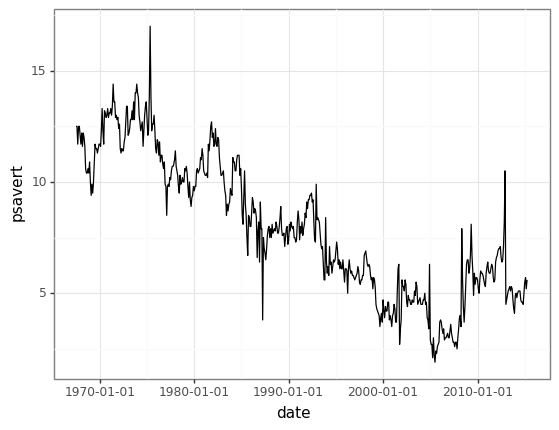

<ggplot: (8779409091341)>

In [4]:
(ggplot(data=economics, mapping=aes(x='date', y='psavert'))+
 geom_line()+theme_bw())

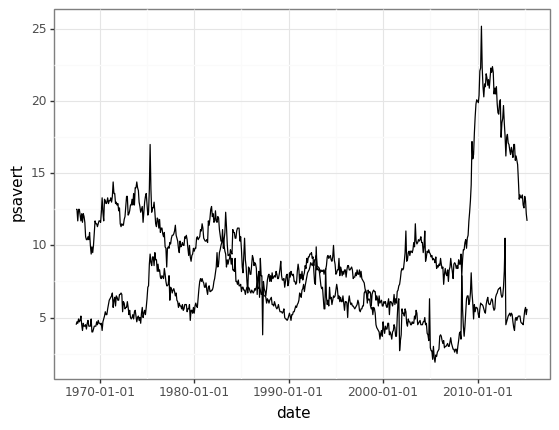

<ggplot: (8779374570734)>

In [5]:
#Let's try!

(ggplot(data=economics, mapping=aes(x='date', y='psavert'))+
 geom_line()+
 geom_line(aes(x='date', y='uempmed'))+
 theme_bw())

This works, but is it practical? I don't know which of the lines is which, if I wanted to change the color I would need to enter lots of commands to do so... Maybe I can attribute a simple aesthetic to make this easier?

In [6]:
econrate = pd.melt(economics, id_vars=["date"], 
                   value_vars=["psavert", "uempmed"], 
                   var_name="Type of Rate", value_name="Rate")

econrate.head()

,date,Type of Rate,Rate
0,1967-07-01,psavert,12.5
1,1967-08-01,psavert,12.5
2,1967-09-01,psavert,11.7
3,1967-10-01,psavert,12.5
4,1967-11-01,psavert,12.5


In [7]:
econrate.tail()

,date,Type of Rate,Rate
1143,2014-12-01,uempmed,12.6
1144,2015-01-01,uempmed,13.4
1145,2015-02-01,uempmed,13.1
1146,2015-03-01,uempmed,12.2
1147,2015-04-01,uempmed,11.7


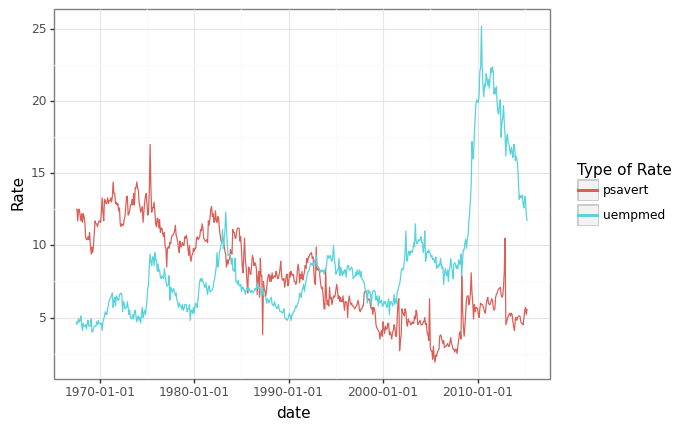

<ggplot: (8779391387965)>

In [8]:
#Now let's try this

(ggplot(data=econrate, mapping=aes(x='date', y='Rate', color='Type of Rate'))+
 geom_line()+
 theme_bw())

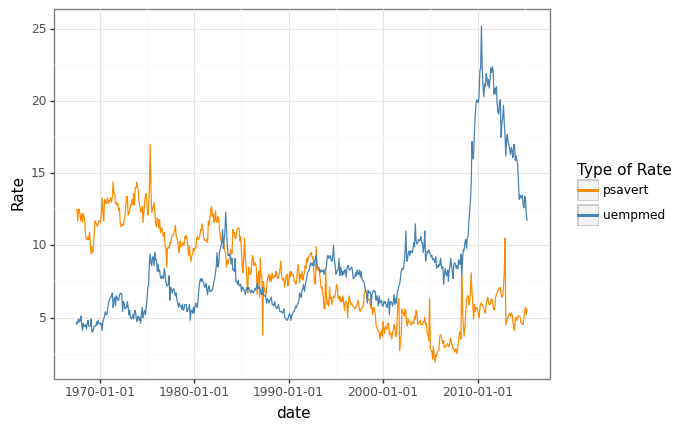

<ggplot: (8779409291939)>

In [9]:
#Could I change the colors to something I like more?

(ggplot(data=econrate, mapping=aes(x='date', y='Rate', color='Type of Rate'))+
 geom_line()+
 scale_color_manual(values=['darkorange', 'steelblue'])+
 theme_bw())


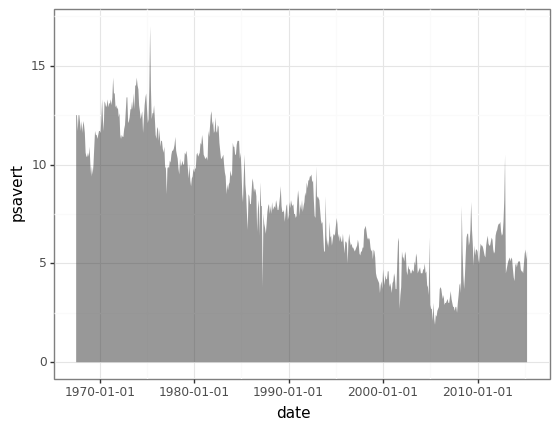

<ggplot: (8779409294544)>

In [10]:
# Area plots

(ggplot(data=economics, mapping=aes(x='date', y='psavert'))+
 geom_area(alpha=0.5)+
 theme_bw())


We will do the same as we did before but now I kind of want to pick some good colors, let's look at some reference:

http://sape.inf.usi.ch/quick-reference/ggplot2/colour


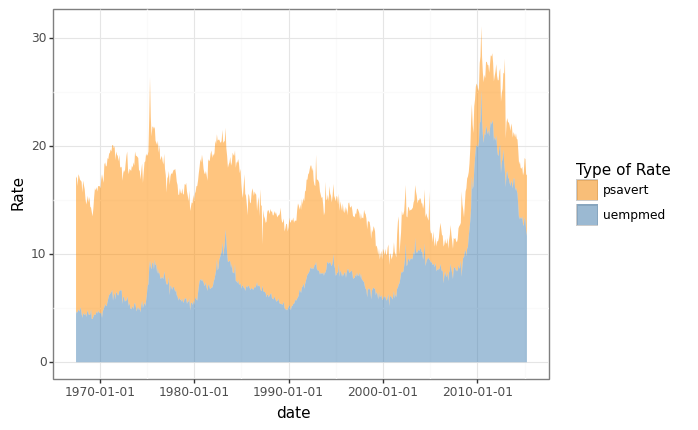

<ggplot: (8779430557931)>

In [11]:
(ggplot(data=econrate, mapping=aes(x='date', y='Rate', fill='Type of Rate' ))+
 geom_area(alpha=0.5)+
 scale_fill_manual(values=['darkorange', 'steelblue'])+
 theme_bw())

In [12]:
from plotnine.data import mpg

In [13]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [14]:
#Let's look at a correlation matrix for the factors in mpg

mpg.corr()

<ipython-input-14-181a906b0eb7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


In [15]:
#Let's organize them into a dataframe that will allow us to plot this easier

mpg1=mpg.corr()

listoflist = []
for in1 in mpg1.index:
    for in2 in mpg1.columns:
        listoflist.append([in1, in2, mpg1.loc[in1, in2]])

mpgdf = pd.DataFrame(data=listoflist, columns=["att1", "att2", "correlation"])

mpgdf

<ipython-input-15-83e9920994ed>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,att1,att2,correlation
0,displ,displ,1.000000
1,displ,year,0.147843
2,displ,cyl,0.930227
3,displ,cty,-0.798524
4,displ,hwy,-0.766020
5,year,displ,0.147843
6,year,year,1.000000
7,year,cyl,0.122245
8,year,cty,-0.037232
9,year,hwy,0.002158


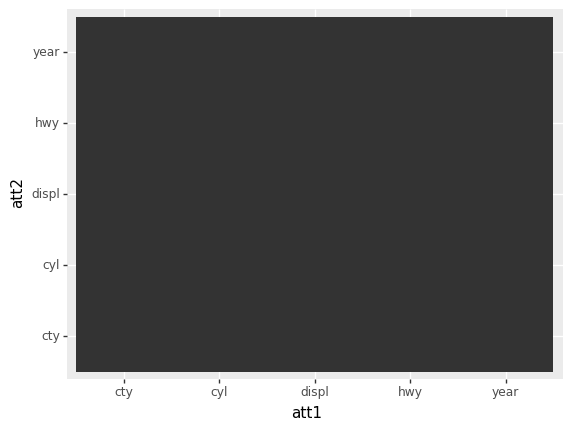

<ggplot: (8779430600569)>

In [16]:
(ggplot(data=mpgdf, mapping= aes(x='att1', y='att2'))+
 geom_tile()
 )

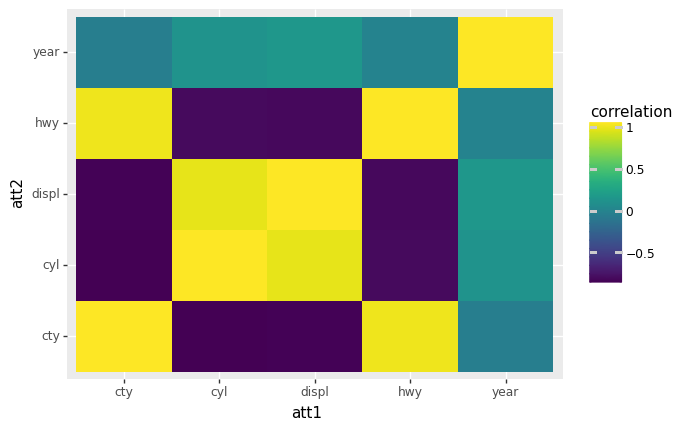

<ggplot: (8779430344211)>

In [17]:
#OK... what

(ggplot(data=mpgdf, mapping= aes(x='att1', y='att2', fill='correlation'))+
 geom_tile()
 )


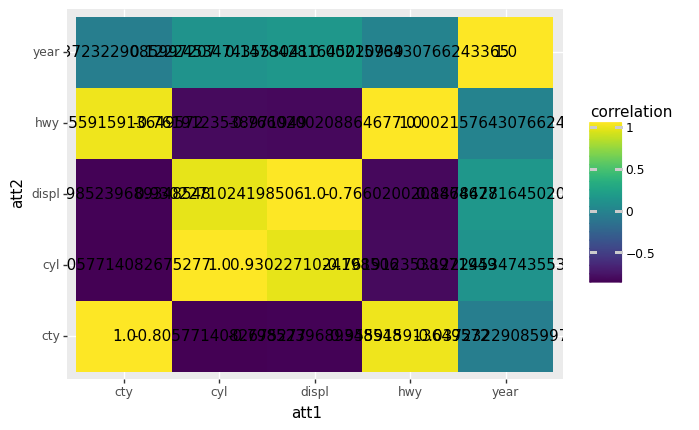

<ggplot: (8779391382107)>

In [18]:
#Better, let's add some numbers

(ggplot(data=mpgdf, mapping= aes(x='att1', y='att2', fill='correlation'))+
 geom_tile()+
 geom_text(aes(x='att1', y='att2', label='correlation'))
 )

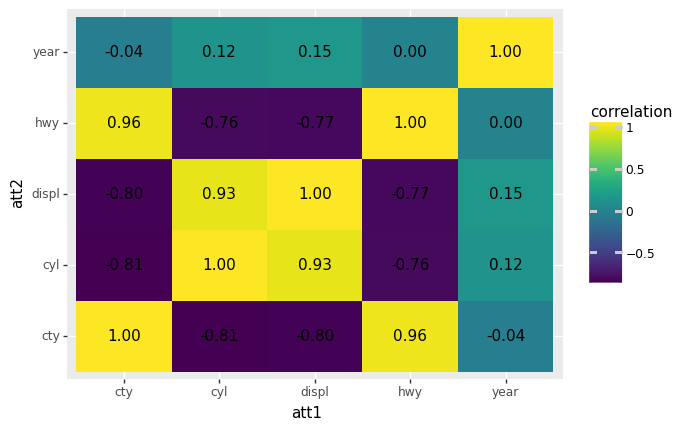

<ggplot: (8779374578128)>

In [19]:
#Let's solve this

(ggplot(data=mpgdf, mapping= aes(x='att1', y='att2', fill='correlation'))+
 geom_tile()+
 geom_text(aes(x='att1', y='att2', label='correlation' ), format_string='{:.2f}')
 )

## THEMES


So far we have been using theme_bw() for lots of our plots. But maybe we could use something different. All of the following themes are available:


  'theme_538',
  'theme_bw',
  'theme_classic',
  'theme_dark',
  'theme_gray',
  'theme_grey',
  'theme_light',
  'theme_linedraw',
  'theme_matplotlib',
  'theme_minimal',
  'theme_seaborn',
  'theme_void',
  'theme_xkcd',
  'theme_get',
  'theme_set',
  'theme_update'
  
Experiment and see which one you like best!

We can also make our own themes, which will be the topic of this section.

In [20]:
#We will use the copper (and other) exports to China dataset

copper = pd.read_csv("https://git.io/JecIS")

copper.head()

,product,year,export,percentage,sum
0,copper,2006,4176,79,5255
1,copper,2007,8560,81,10505
2,copper,2008,6473,76,8519
3,copper,2009,10465,80,13027
4,copper,2010,14977,86,17325


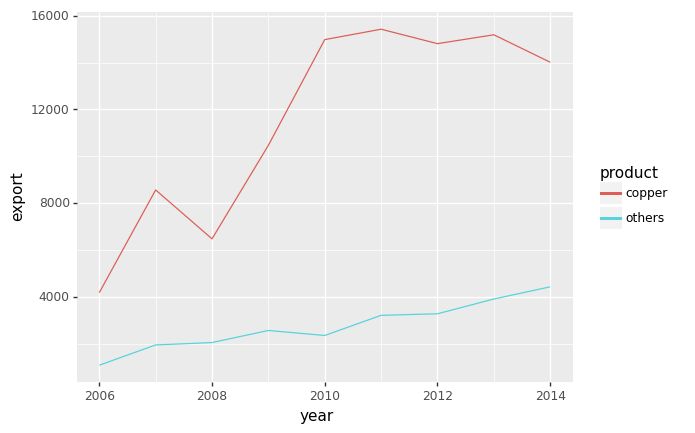

<ggplot: (8779374856202)>

In [21]:
#Let's start with a simple line plot

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line())



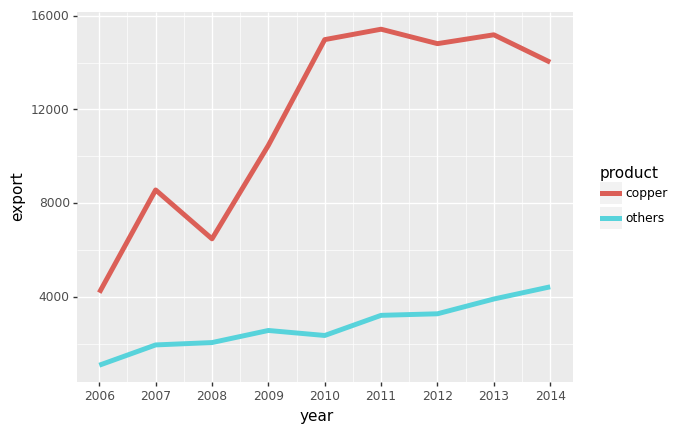

<ggplot: (8779430613315)>

In [22]:
# I would also like every year to show on the x axis and
# for the lines to be a bit thicker

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))
)

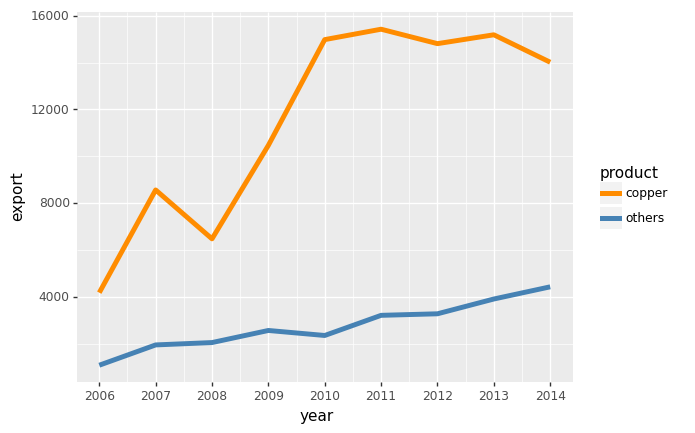

<ggplot: (8779374903796)>

In [23]:
# we know how to change the line colors now,
#pick your favorite. Modify the code below:

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))+
 scale_color_manual(values=['darkorange', 'steelblue'])
)

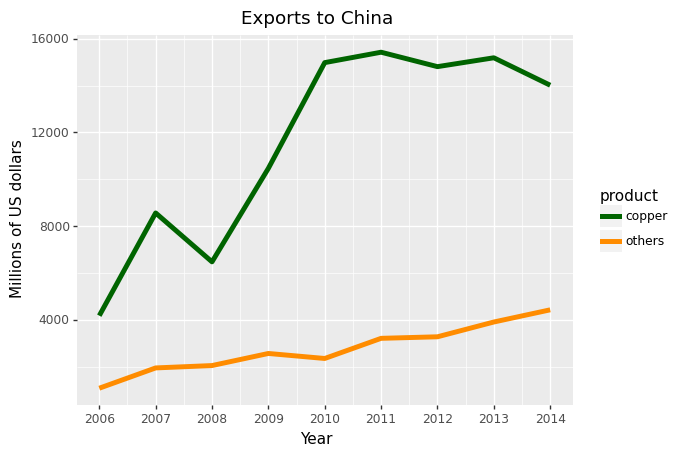

<ggplot: (8779374968095)>

In [24]:
#Let's add some nice titles 

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))+
 scale_color_manual(['darkgreen', 'darkorange'])+
 ggtitle("Exports to China")+
 xlab("Year")+
 ylab("Millions of US dollars")
)

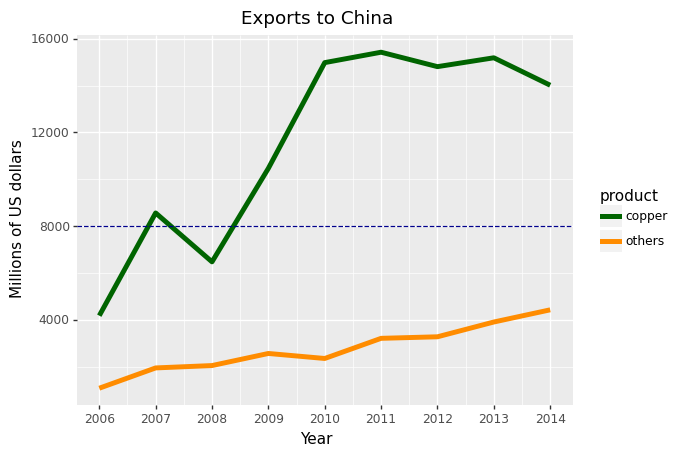

<ggplot: (8779375336189)>

In [25]:
#To finish i want to add a dashed horizontal line at 8000
# million dollars to signify when exports were above

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))+
 scale_color_manual(['darkgreen', 'darkorange'])+
 ggtitle("Exports to China")+
 xlab("Year")+
 ylab("Millions of US dollars")+
 geom_hline(yintercept=8000, linetype='dashed', color='darkblue')
)

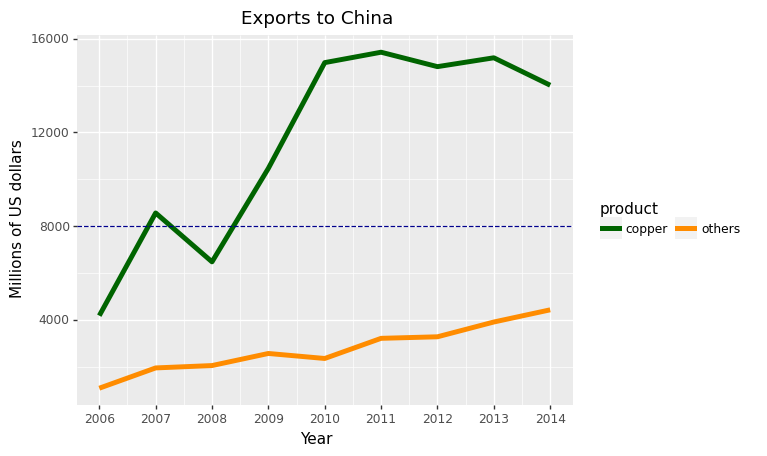

<ggplot: (8779409164026)>

In [26]:
#We have done a lot of work, but this is still ugly
#Themes help us change several elements on the plot 
#in terms of position, fonts, size and color (they change)
# your canvas rather than your plot
#Let's make the legend horizontal

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))+
 scale_color_manual(['darkgreen', 'darkorange'])+
 ggtitle("Exports to China")+
 xlab("Year")+
 ylab("Millions of US dollars")+
 geom_hline(yintercept=8000, linetype='dashed', color='darkblue')+
 
 theme(
     legend_direction='horizontal'
 )
)


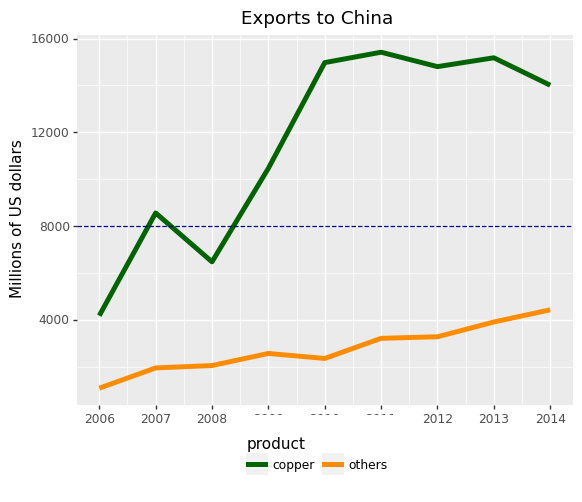

<ggplot: (8779374882585)>

In [27]:
#Maybe I want it to be horizontal...

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))+
 scale_color_manual(['darkgreen', 'darkorange'])+
 ggtitle("Exports to China")+
 xlab("Year")+
 ylab("Millions of US dollars")+
 geom_hline(yintercept=8000, linetype='dashed', color='darkblue')+
 
 theme(
    
     legend_direction='horizontal',
     legend_position='bottom'
 )
)

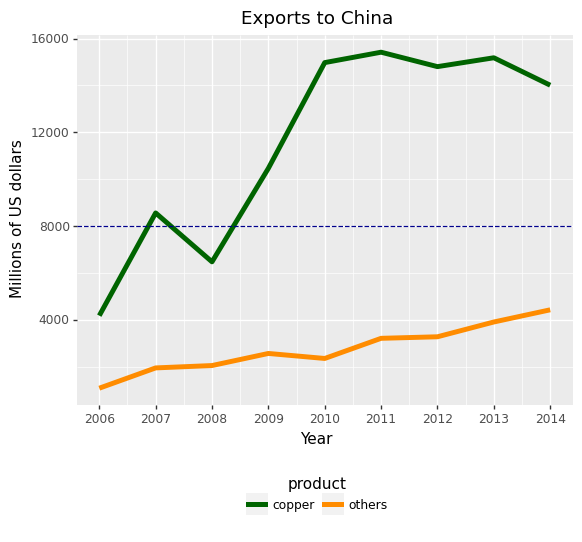

<ggplot: (8779374880531)>

In [28]:
#Let's center it and add some space in the bottom

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))+
 scale_color_manual(['darkgreen', 'darkorange'])+
 ggtitle("Exports to China")+
 xlab("Year")+
 ylab("Millions of US dollars")+
 geom_hline(yintercept=8000, linetype='dashed', color='darkblue')+
 
 theme(
    
     legend_direction='horizontal',
     legend_position='bottom',
     legend_title_align='center',
     legend_box_spacing=0.5
 )
)

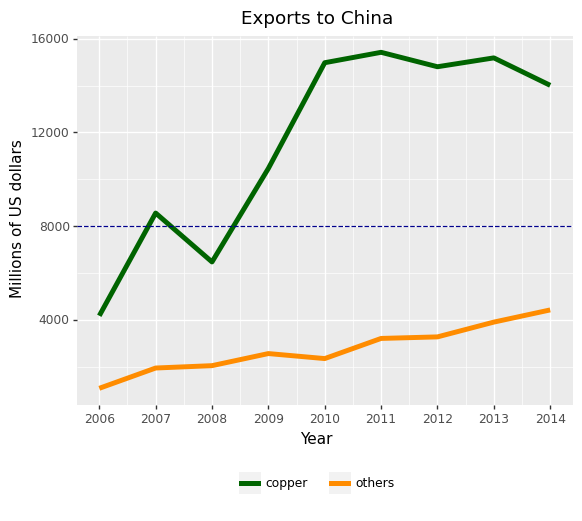

<ggplot: (8779375461735)>

In [29]:
#Let's space out the legend elements and get rid 
# of the legend's title

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))+
 scale_color_manual(['darkgreen', 'darkorange'])+
 ggtitle("Exports to China")+
 xlab("Year")+
 ylab("Millions of US dollars")+
 geom_hline(yintercept=8000, linetype='dashed', color='darkblue')+
 
 theme(
    
     legend_direction='horizontal',
     legend_position='bottom',
     legend_title_align='center',
     legend_box_spacing=0.5,
     legend_entry_spacing_x=15,
     legend_title=element_blank()
 )
)

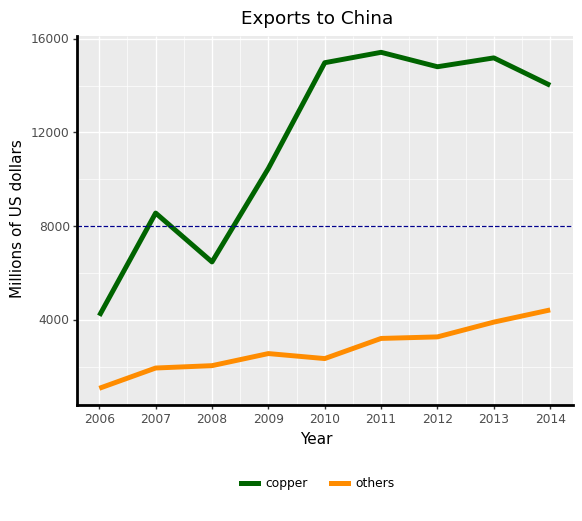

<ggplot: (8779375495105)>

In [30]:
#Let's make the axis lines thicker
# let's get rid of the legend key

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))+
 scale_color_manual(['darkgreen', 'darkorange'])+
 ggtitle("Exports to China")+
 xlab("Year")+
 ylab("Millions of US dollars")+
 geom_hline(yintercept=8000, linetype='dashed', color='darkblue')+
 
 theme(
    
     legend_direction='horizontal',
     legend_position='bottom',
     legend_title_align='center',
     legend_box_spacing=0.5,
     legend_entry_spacing_x=15,
     legend_title=element_blank(),
     axis_line_x=element_line(size=2, colour="black"),
     axis_line_y=element_line(size=2, colour="black"),
     legend_key=element_blank()
 )
)

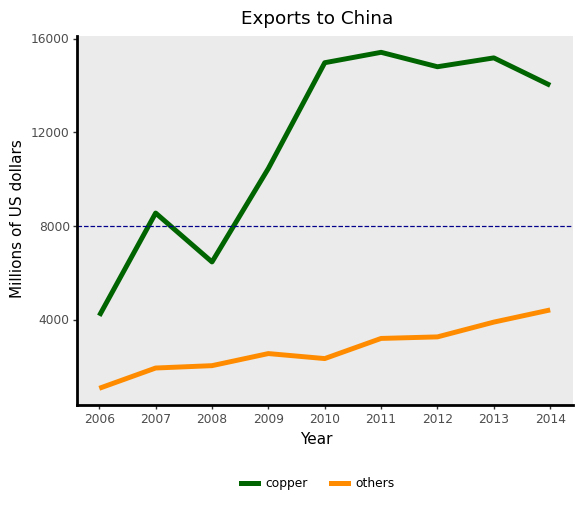

<ggplot: (8779375739365)>

In [31]:
#Let's get rid of the grid lines:

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))+
 scale_color_manual(['darkgreen', 'darkorange'])+
 ggtitle("Exports to China")+
 xlab("Year")+
 ylab("Millions of US dollars")+
 geom_hline(yintercept=8000, linetype='dashed', color='darkblue')+
 
 theme(
    
     legend_direction='horizontal',
     legend_position='bottom',
     legend_title_align='center',
     legend_box_spacing=0.5,
     legend_entry_spacing_x=15,
     legend_title=element_blank(),
     axis_line_x=element_line(size=2, colour="black"),
     axis_line_y=element_line(size=2, colour="black"),
     legend_key=element_blank(),
     panel_grid_major=element_blank(),
     panel_grid_minor=element_blank()
 )
)

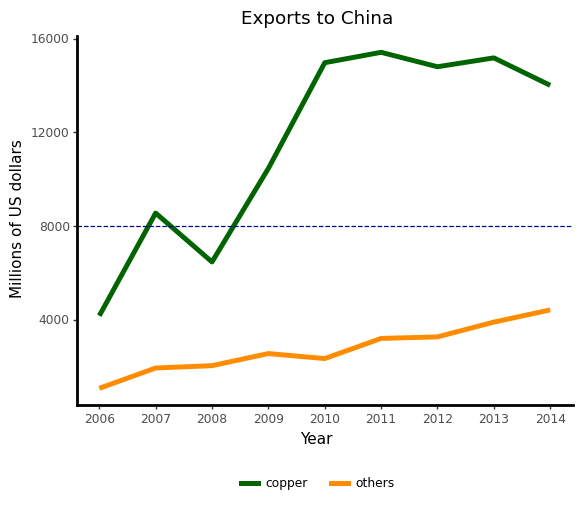

<ggplot: (8779375597297)>

In [32]:
#Remove borders and background

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))+
 scale_color_manual(['darkgreen', 'darkorange'])+
 ggtitle("Exports to China")+
 xlab("Year")+
 ylab("Millions of US dollars")+
 geom_hline(yintercept=8000, linetype='dashed', color='darkblue')+
 
 theme(
    
     legend_direction='horizontal',
     legend_position='bottom',
     legend_title_align='center',
     legend_box_spacing=0.5,
     legend_entry_spacing_x=15,
     legend_title=element_blank(),
     axis_line_x=element_line(size=2, colour="black"),
     axis_line_y=element_line(size=2, colour="black"),
     legend_key=element_blank(),
     panel_grid_major=element_blank(),
     panel_grid_minor=element_blank(),
     panel_border=element_blank(),
     panel_background=element_blank()
     
 )
)

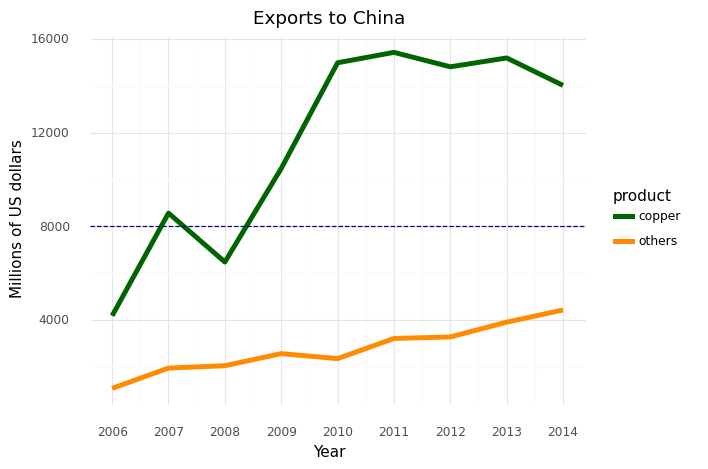

<ggplot: (8779375909169)>

In [33]:
# We actually got pretty close to one theme that already existS!

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))+
 scale_color_manual(['darkgreen', 'darkorange'])+
 ggtitle("Exports to China")+
 xlab("Year")+
 ylab("Millions of US dollars")+
 geom_hline(yintercept=8000, linetype='dashed', color='darkblue')+
 theme_minimal()
)

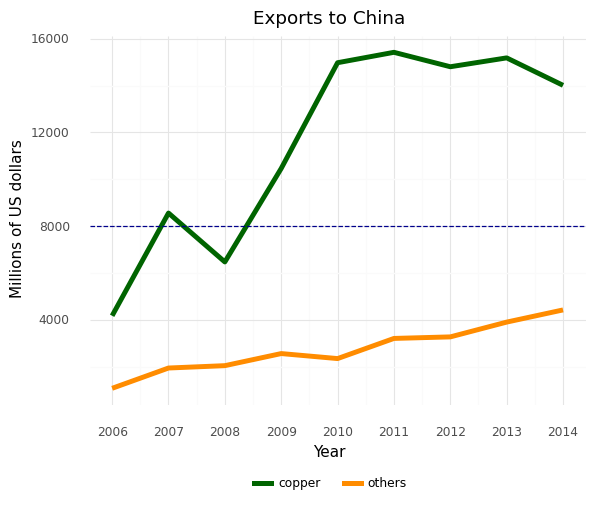

<ggplot: (8779375793671)>

In [34]:
# we can combine existing themes with custom ones! 

(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))+
 scale_color_manual(['darkgreen', 'darkorange'])+
 ggtitle("Exports to China")+
 xlab("Year")+
 ylab("Millions of US dollars")+
 geom_hline(yintercept=8000, linetype='dashed', color='darkblue')+
 theme_minimal()+
 theme(
     legend_direction='horizontal',
     legend_position='bottom',
     legend_title_align='center',
     legend_box_spacing=0.5,
     legend_entry_spacing_x=15,
     legend_title=element_blank()
 )
)

Themes in Python are pretty cool

Have you ever read [XKCD](https://xkcd.com/1064/) ?

Plotnine has a XKCD theme! So, next time you want to make a funny for social media... consider it...


findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font

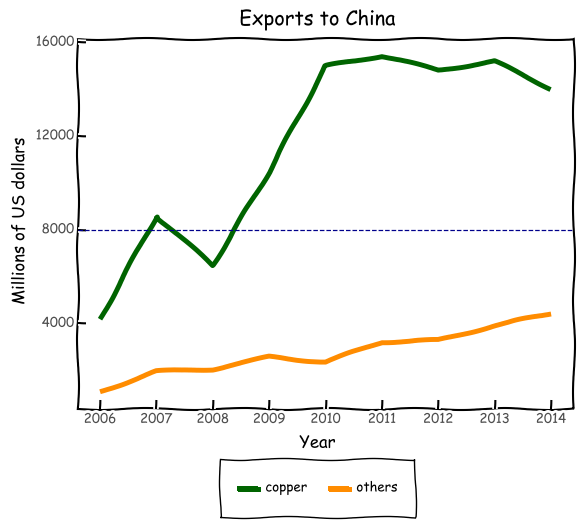

<ggplot: (8779409200996)>

In [35]:
(ggplot(copper, aes("year", "export", color="product"))+
     geom_line(size=2)+
 scale_x_continuous(breaks=np.arange(2006,2015, 1))+
 scale_color_manual(['darkgreen', 'darkorange'])+
 ggtitle("Exports to China")+
 xlab("Year")+
 ylab("Millions of US dollars")+
 geom_hline(yintercept=8000, linetype='dashed', color='darkblue')+
 theme_xkcd()+
 theme(
     legend_direction='horizontal',
     legend_position='bottom',
     legend_title_align='center',
     legend_box_spacing=0.5,
     legend_entry_spacing_x=15,
     legend_title=element_blank()
 )
)